In [47]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [48]:
# import tensorflow as tf

In [49]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [50]:
data_path = os.getcwd() + "/BirdVsDrone"

In [51]:
batch_size = 32

In [52]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=(150, 150,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.50))


model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(rate=0.50))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))

model.add(Dense(units=2, activation='sigmoid'))


In [53]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [54]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 146, 146, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 73, 73, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 71, 71, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 35, 35, 32)       0         
 g2D)                                                 

In [55]:
train_datagen = ImageDataGenerator(rescale=1./255,
                 shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split= 0.2)
train_generator = train_datagen.flow_from_directory(data_path, target_size=(150, 150), batch_size=batch_size,
                                                  class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory(data_path, target_size=(150, 150), batch_size=batch_size,
                                                  class_mode='binary', shuffle=False, subset='validation')

Found 662 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [56]:
history = model.fit(train_generator,
                  steps_per_epoch=train_generator.samples//batch_size,
                  validation_data=validation_generator,
                  validation_steps=validation_generator.samples//batch_size,
                  epochs=90)

Epoch 1/90
20/20 [==============================] - 19s 893ms/step - loss: 0.7570 - accuracy: 0.4778 - val_loss: 0.6930 - val_accuracy: 0.5125
Epoch 2/90
20/20 [==============================] - 17s 857ms/step - loss: 0.6877 - accuracy: 0.5476 - val_loss: 0.6825 - val_accuracy: 0.6500
Epoch 3/90
20/20 [==============================] - 17s 860ms/step - loss: 0.6832 - accuracy: 0.5524 - val_loss: 0.6730 - val_accuracy: 0.7625
Epoch 4/90
20/20 [==============================] - 18s 883ms/step - loss: 0.6757 - accuracy: 0.6063 - val_loss: 0.6533 - val_accuracy: 0.6187
Epoch 5/90
20/20 [==============================] - 18s 895ms/step - loss: 0.6344 - accuracy: 0.6810 - val_loss: 0.5698 - val_accuracy: 0.8000
Epoch 6/90
20/20 [==============================] - 17s 863ms/step - loss: 0.6029 - accuracy: 0.6905 - val_loss: 0.4536 - val_accuracy: 0.8250
Epoch 7/90
20/20 [==============================] - 18s 881ms/step - loss: 0.5992 - accuracy: 0.6667 - val_loss: 0.5903 - val_accuracy: 0.7500

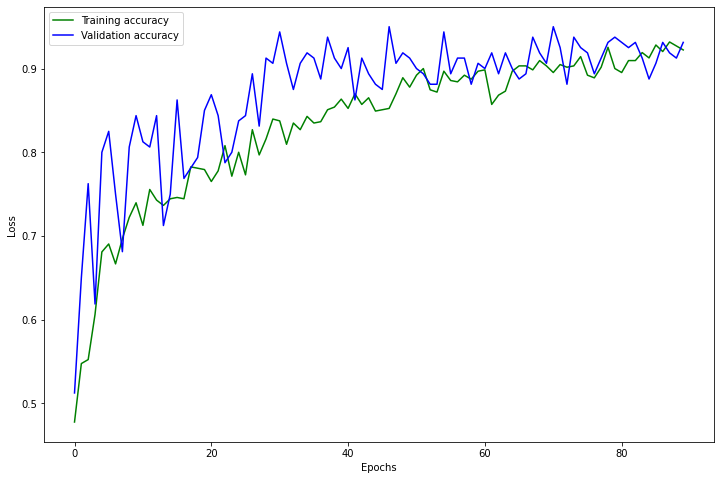

In [57]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], color='g', label='Training accuracy')
plt.plot(history.history['val_accuracy'], color='b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("acc", bbox_inches = 'tight')
plt.show()

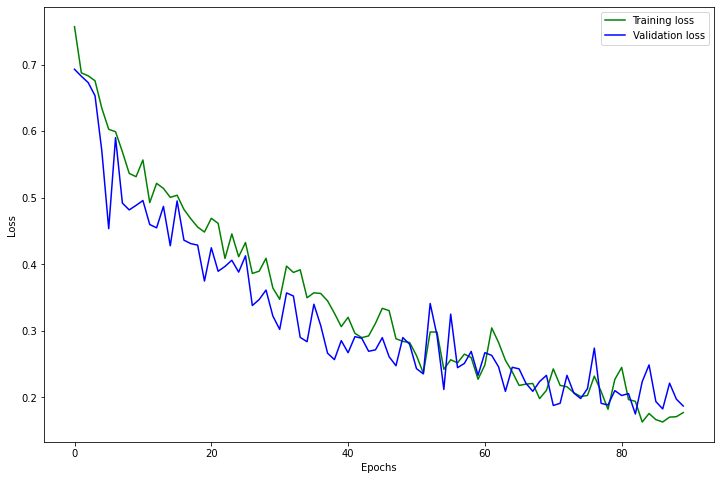

In [58]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['loss'], color='g', label='Training loss')
plt.plot(history.history['val_loss'], color='b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("loss", bbox_inches='tight')
plt.show()

In [59]:
model.evaluate(validation_generator)

6/6 [==============================] - 2s 257ms/step - loss: 0.1821 - accuracy: 0.9268


[0.18207186460494995, 0.9268292784690857]

In [60]:
pred = model.predict(validation_generator)
Y_pred = model.predict(validation_generator, len(validation_generator)//batch_size+1)

6/6 [==============================] - 2s 251ms/step


In [61]:
y_pred = np.argmax(Y_pred, axis=1)

In [62]:
print('Confusion matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

Confusion matrix
[[69 10]
 [ 1 84]]


In [63]:
print('Classification report')
target_name = ['Drones', 'Birds']
print(classification_report(validation_generator.classes, y_pred, target_names=target_name))

Classification report
              precision    recall  f1-score   support

      Drones       0.99      0.87      0.93        79
       Birds       0.89      0.99      0.94        85

    accuracy                           0.93       164
   macro avg       0.94      0.93      0.93       164
weighted avg       0.94      0.93      0.93       164



In [64]:
# save model and weights
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")